In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 3s 7ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 2s 4

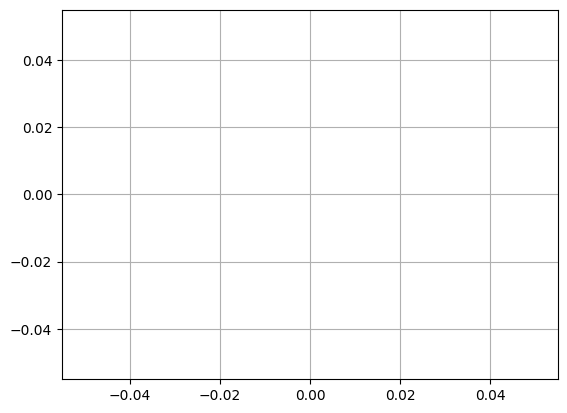

In [6]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [7]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

print(X_train2.shape)
X_test2.shape

(11610, 8)


(5160, 8)

In [8]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train2.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train2, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test2, y_test)
X_new = X_test2[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8031 - val_loss: 71923.9609
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5958 - val_loss: 101413.6406
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4456 - val_loss: 67731.7266
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4091 - val_loss: 76081.8984
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3986 - val_loss: 55514.9570
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3894 - val_loss: 64564.5469
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3888 - val_loss: 30776.6250
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3807 - val_loss: 50251.0000
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3764 - val_loss: 48134.0664
Epoch 10/20
363/363 [==============================] - 1s 3ms/s

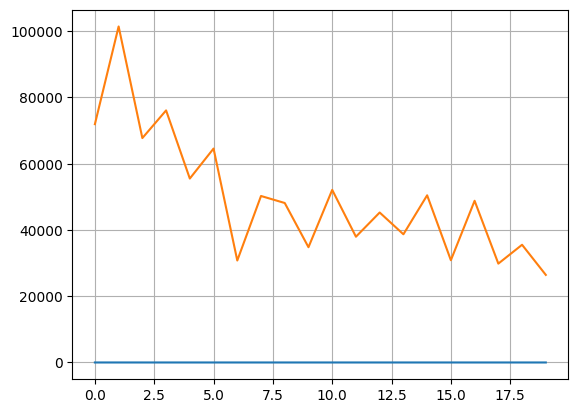

In [9]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

# Dane zawsze muszą być przeskalowane